In [24]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import to_rgba

from core.io_functions import load_data, load_data_era
from core.core_functions import cut_region, mask_domain, get_representative_member, aggregate_area

dpi = 300
mpl.rc('font', **{'size': 8})
cm = 1/2.54  # centimeters in inches

fig_path = '../figures'

In [2]:
indices = {}
for index in ['tx90p']:
    indices[index] = mask_domain(load_data(index))

indices_era = {}
for index in ['tx90p']:
    indices_era[index] = mask_domain(load_data_era(index))

## Figure 1 - with ERA5 as context

In [3]:
index = 'tx90p'

da = indices[index]
da = cut_region(da, lon_bounds=[-12, 60], lat_bounds=[35, 70])
member_median = get_representative_member(da, select_by='median')['member'].item()
member_min = get_representative_member(da, select_by='min')['member'].item()
member_max = get_representative_member(da, select_by='max')['member'].item()

print(f'{member_median=}')
print(f'{member_min=}')
print(f'{member_max=}')

member_median='r15i1p1f1'
member_min='r27i1p1f1'
member_max='r31i1p1f1'


In [9]:
index = 'tx90p'

era = indices_era[index] * 100  # fraction to percent
era = cut_region(era, lon_bounds=[-12, 60], lat_bounds=[35, 70])

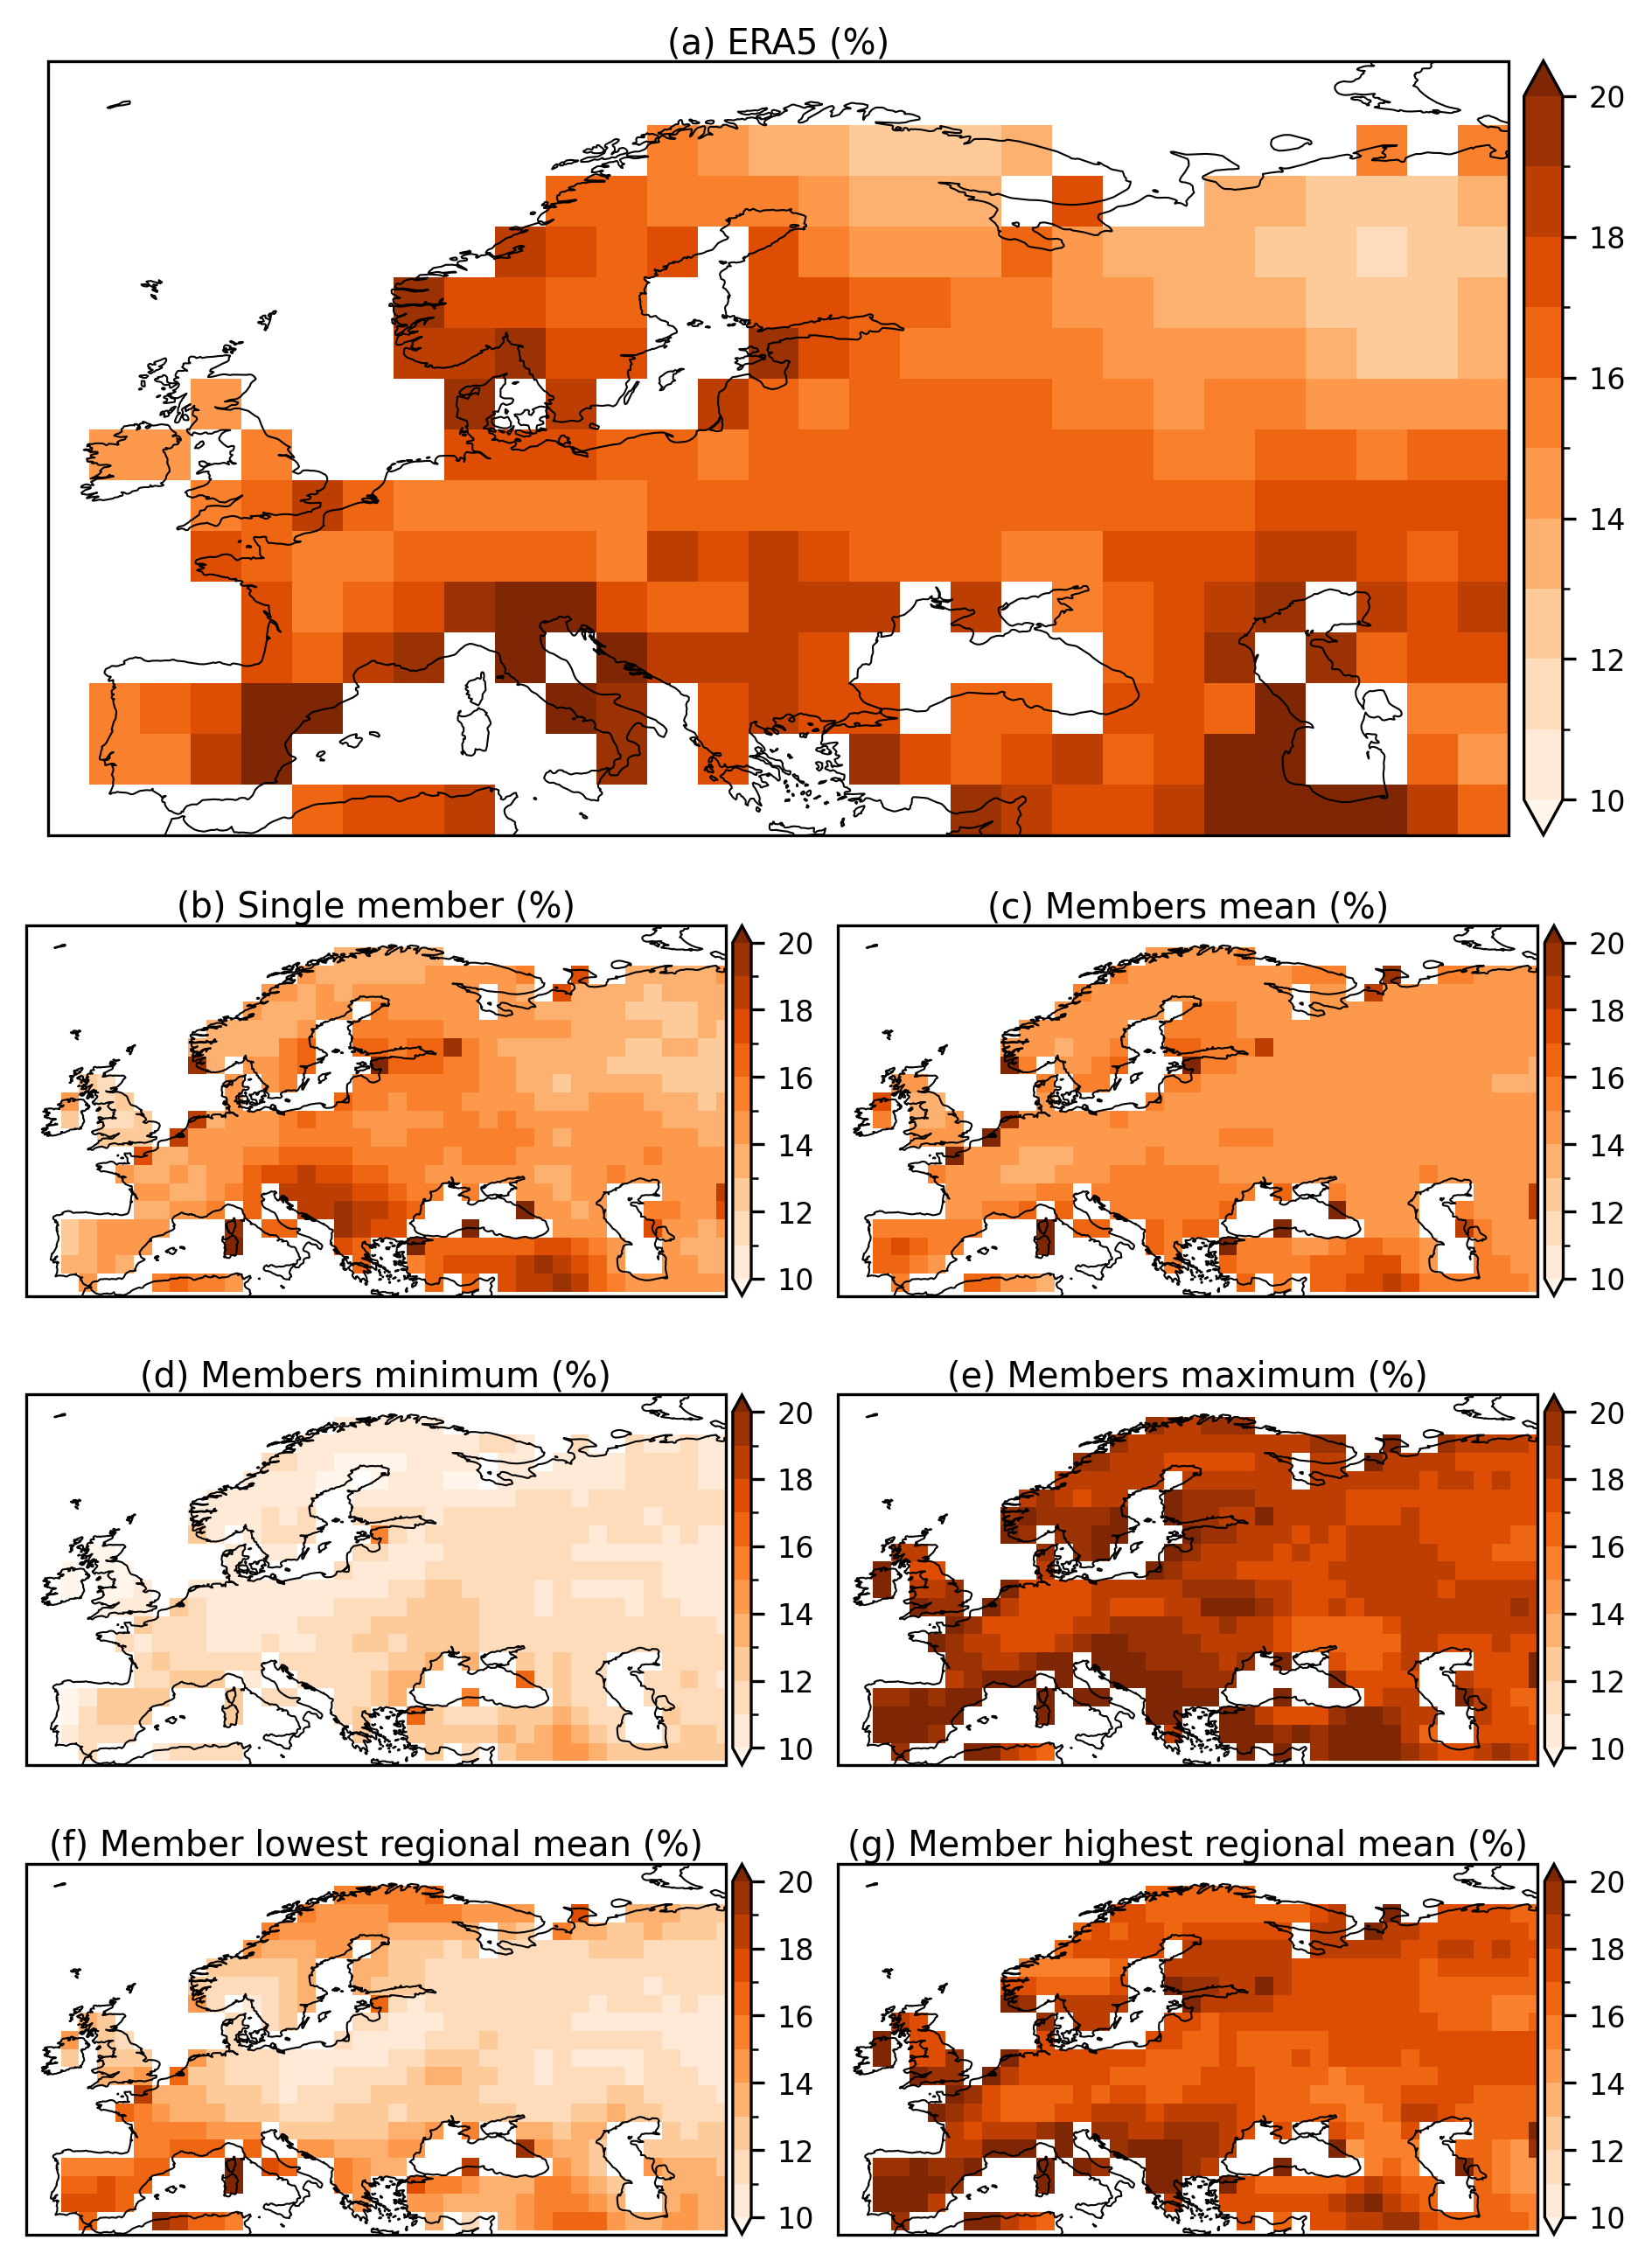

In [28]:
kwargs_figure1 = dict(
    cmap='Oranges',
    levels=np.arange(10, 20.1, 1),
    extend='both',
    cbar_kwargs={'label': '', 'fraction': .0255, 'pad': .01}
)

fig, axes = plt.subplot_mosaic(
    """
    aa
    bc
    de
    fg
    """,
    figsize=(16*cm, 22*cm),
    dpi=dpi,
    height_ratios=[2, 1, 1, 1],
    per_subplot_kw={
        ('a', 'b', 'c', 'd', 'e', 'f', 'g'): {'projection': ccrs.PlateCarree()},
    },
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .01, 'right': .94, 'bottom': .01, 'top': .97},
    
)

for ax in axes.values():
    ax.set_extent([-12, 60, 35, 70])
    ax.coastlines(lw=.5)

subplot = 'a'
era.isel(member=0).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) ERA5 ({da.attrs["units"]})', pad=.1)

subplot = 'b'
da.sel(member=member_median).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Single member ({da.attrs["units"]})', pad=.1)

subplot = 'c'
da.mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members mean ({da.attrs["units"]})', pad=.1)

subplot = 'd'
da.min('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members minimum ({da.attrs["units"]})', pad=.1)

subplot = 'e'
da.max('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members maximum ({da.attrs["units"]})', pad=.1)

subplot = 'f'
da.sel(member=member_min).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Member lowest regional mean ({da.attrs["units"]})', pad=.1)

subplot = 'g'
da.sel(member=member_max).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Member highest regional mean ({da.attrs["units"]})', pad=.1)

plt.savefig(os.path.join(fig_path, 'tx90p_example_era5.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'tx90p_example_era5.pdf'), dpi=dpi)